# Aprendizaje no supervisado
Autora: Beatriz Ibarra Mendoza  
Última actualización: 13/11/2023  


Este notebook analiza datos relacionados con los empleados de una empresa y variables potencialmente relacionadas con la tasa de deserción. El procesamiento de la información incluye la implementación de ingeniería de características para optimizar la base de datos y aprendizaje no supervisado. El análisis y visualización son realizados con Pandas, Numpy y Matplotlib. Lo relacionado con los modelos de aprendizaje no supervisado se realizó con la paquetería Scikit learn. El notebook incluye las siguientes etapas:

* *Instalación* de las paqueterías.  
* *Exploración* de datos.  
* *Ingerniería de características* previa a clustering.  
* Clustering: *K-means*.  
* Clustering: *Single-Linkage*.  
* *Spectral clustering*.  
* *Gráficos* de agrupamiento.  






### Instalación

In [ ]:
# Paqueterías
from sklearn import cluster, metrics
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exploración de datos

In [ ]:
# Datos
employees = pd.read_csv('/content/Train(2).csv')
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [ ]:
employees.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


### Ingeniería de características previa a clustering  



1. Eliminar las variables VAR1 a VAR7 (son variables anónimas y no aportarían información específica al análisis).  
2. Eliminar la variable 'Employee ID' ya que como identificador único para cada empleado no aporta información para encontrar patrones con la tasa de deserción.
2. Imputar datos faltantes en las variables 'Age', 'Time_of_service', 'Pay_Scale' y 'Work_Life_balance'.  
3. Transformar las variables: 'Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess' y 'Compensation_and_Benefits'.

In [ ]:
# Crear una copia del df.
employees2 = employees.copy()
# Eliminar columnas VAR.
employees2 = employees2.drop(columns = ['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'])
# Eliminar columna de ID.
employees2 = employees2.drop(columns = ['Employee_ID'])
# Contar valores faltantes por columna.
pd.isna(employees2).sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

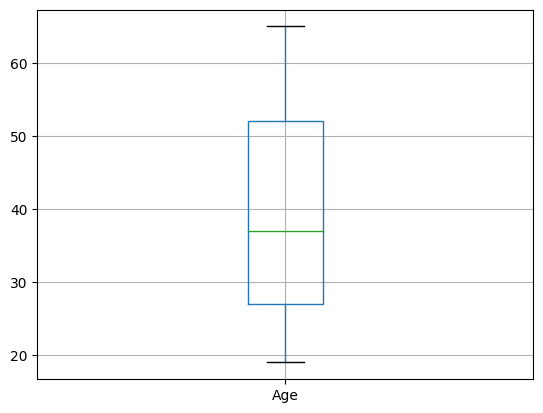

In [ ]:
# Tratamiento de datos faltantes.
employees2.boxplot(column=['Age'])
plt.show()

No hay valores atípicos en la variable 'Age' y aparentemente los datos son normales (hay un ligero sesgo a la izquierda). Por lo tanto, la imputación de 'Age' se realizará con media.

In [ ]:
employees2['Age'].fillna(employees2['Age'].mean(), inplace=True)
employees2.isnull().sum() # Confirmación

Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

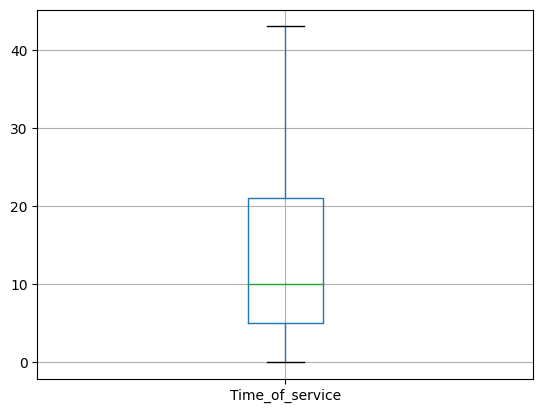

In [ ]:
employees2.boxplot(column=['Time_of_service'])
plt.show()

No hay valores atípicos en la variable 'Time_of_service', sin embargo, los datos están sesgados hacia la izquierda de la campana, por lo que se propone una imputación por mediana, ya que ésta no se afecta por la asimetría de la distribución.

In [ ]:
employees2['Time_of_service'].fillna(employees2['Time_of_service'].median(), inplace=True)
employees2.isnull().sum() # Confirmación

Gender                        0
Age                           0
Education_Level               0
Relationship_Status           0
Hometown                      0
Unit                          0
Decision_skill_possess        0
Time_of_service               0
Time_since_promotion          0
growth_rate                   0
Travel_Rate                   0
Post_Level                    0
Pay_Scale                     9
Compensation_and_Benefits     0
Work_Life_balance            11
Attrition_rate                0
dtype: int64

In [ ]:
employees2['Pay_Scale'].unique()

array([ 7.,  6.,  8.,  2.,  9.,  5.,  4.,  3., 10.,  1., nan])

Por el tipo de datos en esta variable (escala), se realizará imputación por moda.

In [ ]:
moda_pay_scale = employees2['Pay_Scale'].mode()[0]
employees2['Pay_Scale'].fillna(moda_pay_scale, inplace=True)
employees2.isnull().sum() # Confirmación

Gender                        0
Age                           0
Education_Level               0
Relationship_Status           0
Hometown                      0
Unit                          0
Decision_skill_possess        0
Time_of_service               0
Time_since_promotion          0
growth_rate                   0
Travel_Rate                   0
Post_Level                    0
Pay_Scale                     0
Compensation_and_Benefits     0
Work_Life_balance            11
Attrition_rate                0
dtype: int64

In [ ]:
employees['Work_Life_balance'].unique()

array([ 3.,  4.,  1.,  2.,  5., nan])

Como en la variable anterior, esta variable contiene una escala en sus valores, por lo que también se realizará imputación por moda.

In [ ]:
moda_balance = employees2['Work_Life_balance'].mode()[0]
employees2['Work_Life_balance'].fillna(moda_balance, inplace=True)
employees2.isnull().sum() # Confirmación

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
Attrition_rate               0
dtype: int64

In [ ]:
# Transformación de variables categóricas.
for col in employees2.columns:
    if employees2[col].dtype == 'object':
        employees2[col] = OrdinalEncoder().fit_transform(employees2[[col]])
X_train = employees2.to_numpy() # convierte los datos transformados en una matriz np.
print(X_train)

[[ 0.     42.      4.     ...  2.      3.      0.1841]
 [ 1.     24.      3.     ...  2.      4.      0.067 ]
 [ 0.     58.      3.     ...  2.      1.      0.0851]
 ...
 [ 0.     49.      3.     ...  2.      4.      0.7847]
 [ 0.     47.      3.     ...  0.      2.      0.4162]
 [ 0.     58.      3.     ...  2.      3.      0.091 ]]


### Clustering: K-means

In [ ]:
# Estandarizar datos.
x = StandardScaler().fit_transform(X_train)

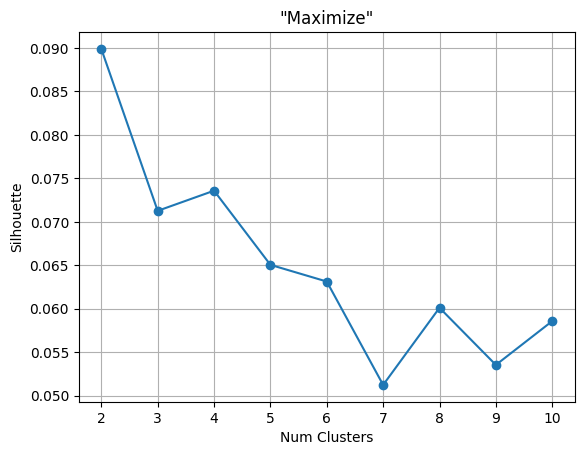

In [ ]:
# Determinación de grupos para K-means con índice Silhouette.
nc = 11
results = {}
for k in range (2, nc):
  k_means = cluster.KMeans(n_clusters=k, n_init = 10, random_state=42).fit(x)
  y_pred = k_means.predict(x)
  results[k] = metrics.silhouette_score(x, y_pred)

cluster_counts = list(results.keys())
index_values = list (results.values())

plt.plot(cluster_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(cluster_counts)
plt.ylabel('Silhouette')
plt.show()

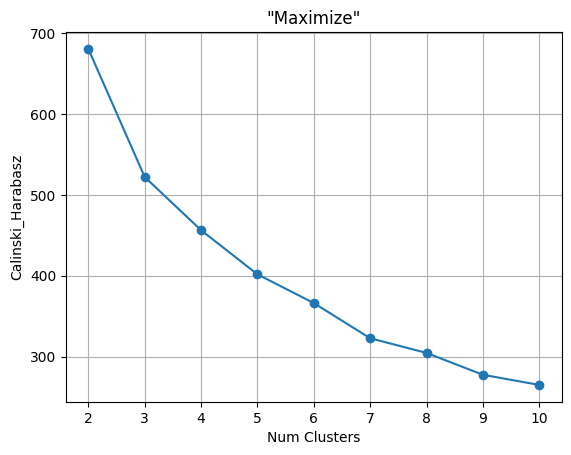

In [ ]:
# Determinación de grupos para K-means con índice Calinski-Harabasz.
nc = 11
results = {}
for k in range (2, nc):
  k_means = cluster.KMeans(n_clusters=k, n_init = 10, random_state=42).fit(x)
  y_pred = k_means.predict(x)
  results[k] = metrics.calinski_harabasz_score(x, y_pred)

cluster_counts = list(results.keys())
index_values = list (results.values())

plt.plot(cluster_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(cluster_counts)
plt.ylabel('Calinski_Harabasz')
plt.show()

Tomar decisiones respecto a la validación de la cantidad de grupos es un tema subjetivo y no tiene una respuesta 'correcta'. En este sentido, es importante considerar la naturaleza de los datos y los objetivos del clustering para enriquecer la validación.  
Al comparar los gráficos entre índices de validación, se puede determinar que 4 grupos (Silhouette) es un número apropiado para realizar el clustering. En el gráfico de Calinski-Harabasz no se observa un valor que indique cuál es el número de grupos adecuado. Esto puede relacionarse con que no hay suficiente compacidad entre los datos.

In [ ]:
# K-means con 4 grupos.
k_means = cluster.KMeans(n_clusters=4, n_init=10, random_state=42).fit(x)
y_pred = k_means.predict(x)
s1 = metrics.silhouette_score(x, y_pred)

In [ ]:
# Añadir al df una columna con el número de grupo que tiene cada registro.
employees2['Group-KMeans'] = y_pred # se añade una columna con el grupo al que pertenece cada registro.
employees2

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate,Group-KMeans
0,0.0,42.0,4,0.0,1.0,2.0,2.0,4.0,4,33,1,1,7.0,2.0,3.0,0.1841,0
1,1.0,24.0,3,1.0,3.0,3.0,0.0,5.0,4,36,0,3,6.0,2.0,4.0,0.0670,2
2,0.0,58.0,3,0.0,0.0,8.0,2.0,27.0,3,51,0,2,8.0,2.0,1.0,0.0851,3
3,0.0,26.0,3,1.0,2.0,1.0,1.0,4.0,3,56,1,3,8.0,2.0,1.0,0.0668,2
4,0.0,31.0,1,0.0,3.0,3.0,2.0,5.0,4,62,1,3,2.0,3.0,3.0,0.1827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,23.0,5,0.0,1.0,5.0,1.0,4.0,1,20,1,2,6.0,3.0,3.0,0.7839,1
6996,0.0,44.0,1,0.0,2.0,9.0,0.0,16.0,2,59,0,2,4.0,3.0,3.0,0.1055,0
6997,0.0,49.0,3,1.0,3.0,2.0,3.0,10.0,1,59,1,2,3.0,2.0,4.0,0.7847,1
6998,0.0,47.0,3,0.0,4.0,10.0,1.0,24.0,1,21,1,5,8.0,0.0,2.0,0.4162,3


In [ ]:
# Analizar cuántos registros tiene cada uno de los grupos.
employees3 = []
for g in range(4):
  employees3.append(employees2[employees2['Group-KMeans']==g])

In [ ]:
for g in range (4):
  print('El grupo '+str(g), 'tiene', len(employees3[g]), 'registros.')

El grupo 0 tiene 2698 registros.
El grupo 1 tiene 585 registros.
El grupo 2 tiene 1665 registros.
El grupo 3 tiene 2052 registros.


In [ ]:
# Df con medias de las variables por grupo para encontrar patrones.
groups_employees = pd.DataFrame()
groups_employees['Features'] = employees2.columns[:-1]
for g in range(4):
  row = []
  for col in groups_employees['Features']:
    if employees3[g][col].dtype != 'object':
      row.append(np.round(employees3[g][col].mean(),2))
    else:
      row.append(employees3[g][col].value_counts().keys()[0])
  groups_employees['Group'+str(g)] = row

In [ ]:
groups_employees

,Features,Group0,Group1,Group2,Group3
0,Gender,0.40,0.48,0.42,0.40
1,Age,31.83,38.25,33.39,55.32
2,Education_Level,3.20,3.16,3.20,3.17
3,Relationship_Status,0.00,0.35,1.00,0.30
4,Hometown,2.19,2.19,2.20,2.17
5,Unit,4.85,5.43,4.91,4.91
6,Decision_skill_possess,1.46,1.57,1.48,1.55
7,Time_of_service,7.06,11.87,8.09,26.20
8,Time_since_promotion,2.28,2.42,2.28,2.53
9,growth_rate,47.02,47.82,47.01,46.96


Con este método de agrupamiento se puede determinar que la mayoría de las variables tiene una media homogénea entre los grupos. Sin embargo, destaca lo siguiente:  
- Los grupos 1 y 3 (Group0 y Group 2) incluyen a los empleados más jóvenes de la empresa y con menor tiempo de servicio.  
- El grupo 2 (Group1) incluye empleados con una edad promedio de 38 años (el segundo grupo con mayor edad), sin embargo, la tasa de deserción es la más alta entre los agrupamientos, así como el valor de unidad. Sería interesante explorar a qué área específica de la empresa pertenecen estos empleados y establecer si existe un correlación con la tasa de deserción.   
- El grupo 4 (Group3) incluye a los empleados de mayor edad y con mayor tiempo de servicio, lo que podría relacionarse con un valor mayor en la escala de pago.  
  


### Clustering: Single Linkage

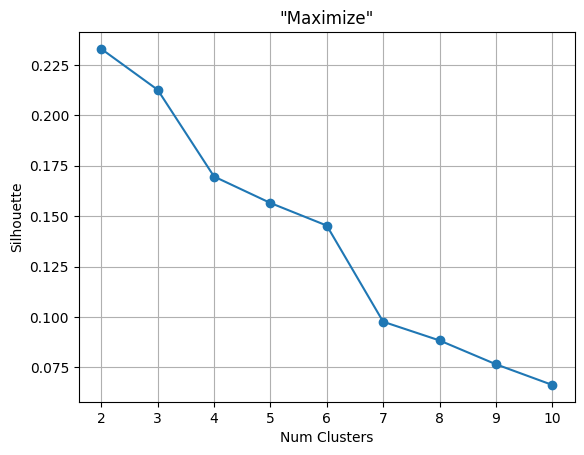

In [ ]:
# Determinación de grupos para Single-Linkage con índice Silhouette.
nc = 11
results = {}
for k in range (2, nc):
  single_linkage = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
  y_pred2 = single_linkage.fit_predict(x)
  results[k] = metrics.silhouette_score(x, y_pred2)

cluster_counts = list(results.keys())
index_values = list (results.values())

plt.plot(cluster_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(cluster_counts)
plt.ylabel('Silhouette')
plt.show()

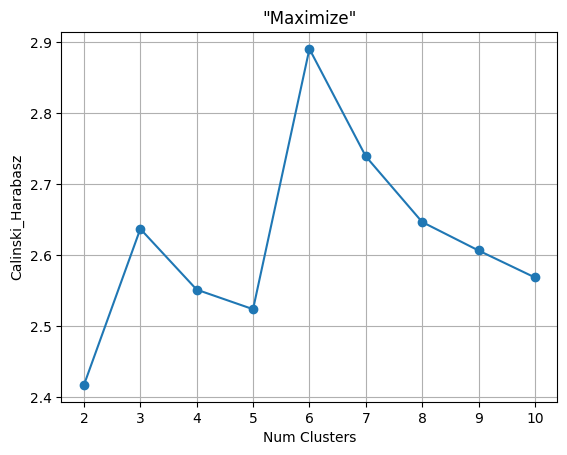

In [ ]:
# Determinación de grupos para Single Linkage con índice Calinski-Harabasz.
nc = 11
results = {}
for k in range (2, nc):
  single_linkage = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
  y_pred2 = single_linkage.fit_predict(x)
  results[k] = metrics.calinski_harabasz_score(x, y_pred2)

cluster_counts = list(results.keys())
index_values = list (results.values())

plt.plot(cluster_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(cluster_counts)
plt.ylabel('Calinski_Harabasz')
plt.show()

Con base en los gráficos de índices de validación, el número adecuado de grupos para este modelo es 6.

In [ ]:
# Single Linkage
single_linkage = cluster.AgglomerativeClustering(linkage='single', n_clusters=6)
y_pred2 = single_linkage.fit_predict(x)
s2 = metrics.silhouette_score(x, y_pred2)

In [ ]:
# Añadir al df una columna con el número de grupo que tiene cada registro.
employees2['Group-SingleLinkage'] = y_pred2
employees2

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate,Group-KMeans,Group-SingleLinkage
0,0.0,42.0,4,0.0,1.0,2.0,2.0,4.0,4,33,1,1,7.0,2.0,3.0,0.1841,0,0
1,1.0,24.0,3,1.0,3.0,3.0,0.0,5.0,4,36,0,3,6.0,2.0,4.0,0.0670,2,0
2,0.0,58.0,3,0.0,0.0,8.0,2.0,27.0,3,51,0,2,8.0,2.0,1.0,0.0851,3,0
3,0.0,26.0,3,1.0,2.0,1.0,1.0,4.0,3,56,1,3,8.0,2.0,1.0,0.0668,2,0
4,0.0,31.0,1,0.0,3.0,3.0,2.0,5.0,4,62,1,3,2.0,3.0,3.0,0.1827,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,23.0,5,0.0,1.0,5.0,1.0,4.0,1,20,1,2,6.0,3.0,3.0,0.7839,1,0
6996,0.0,44.0,1,0.0,2.0,9.0,0.0,16.0,2,59,0,2,4.0,3.0,3.0,0.1055,0,0
6997,0.0,49.0,3,1.0,3.0,2.0,3.0,10.0,1,59,1,2,3.0,2.0,4.0,0.7847,1,0
6998,0.0,47.0,3,0.0,4.0,10.0,1.0,24.0,1,21,1,5,8.0,0.0,2.0,0.4162,3,0


In [ ]:
# Analizar cuántos registros tiene cada uno de los grupos.
employees3 = []
for g in range(6):
  employees3.append(employees2[employees2['Group-SingleLinkage']==g])

In [ ]:
for g in range (6):
  print('El grupo '+str(g), 'tiene', len(employees3[g]), 'registros.')

El grupo 0 tiene 6994 registros.
El grupo 1 tiene 1 registros.
El grupo 2 tiene 2 registros.
El grupo 3 tiene 1 registros.
El grupo 4 tiene 1 registros.
El grupo 5 tiene 1 registros.


In [ ]:
# Df con medias de las variables por grupo para encontrar patrones.
groups_employees = pd.DataFrame()
groups_employees['Features'] = employees2.columns[:-3]
for g in range(6):
  row = []
  for col in groups_employees['Features']:
    if employees3[g][col].dtype != 'object':
      row.append(np.round(employees3[g][col].mean(),2))
    else:
      row.append(employees3[g][col].value_counts().keys()[0])
  groups_employees['Group'+str(g)] = row

In [ ]:
groups_employees

,Features,Group0,Group1,Group2,Group3,Group4,Group5
0,Gender,0.41,1.0,0.5,1.0,1.0,1.0
1,Age,39.63,47.0,23.5,28.0,19.0,20.0
2,Education_Level,3.19,4.0,4.5,3.0,1.0,3.0
3,Relationship_Status,0.35,1.0,1.0,0.0,1.0,0.0
4,Hometown,2.19,1.0,2.0,2.0,2.0,1.0
5,Unit,4.92,9.0,10.0,10.0,7.0,10.0
6,Decision_skill_possess,1.50,0.0,0.0,3.0,2.0,0.0
7,Time_of_service,13.32,25.0,4.5,4.0,0.0,1.0
8,Time_since_promotion,2.37,2.0,1.5,1.0,0.0,1.0
9,growth_rate,47.06,33.0,55.0,48.0,38.0,53.0


Con este método de clustering la mayoría de los datos se agrupó en el grupo 1 (Group0), es posible que sea necesario hacer un ajuste en los parámetros del algoritmo o que no sea el más adecuado para este tipo de datos.




### Spectral Clustering

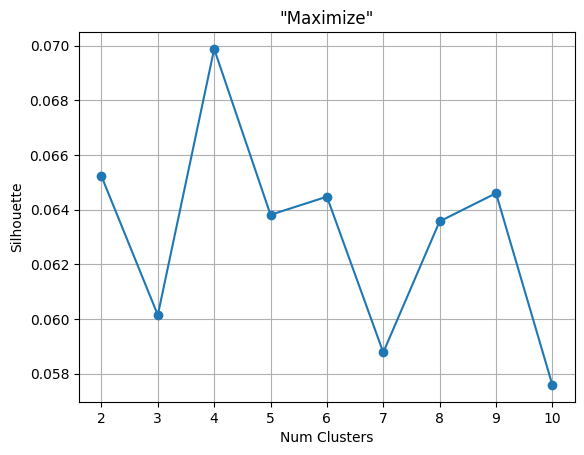

In [ ]:
# Determinación de grupos para Spectral Clustering con índice Silhouette.
nc = 11
results = {}
for k in range (2, nc):
  spectral = cluster.SpectralClustering(n_clusters=k, affinity='nearest_neighbors')
  y_pred3 = spectral.fit_predict(x)
  results[k] = metrics.silhouette_score(x, y_pred3)

cluster_counts = list(results.keys())
index_values = list (results.values())

plt.plot(cluster_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(cluster_counts)
plt.ylabel('Silhouette')
plt.show()

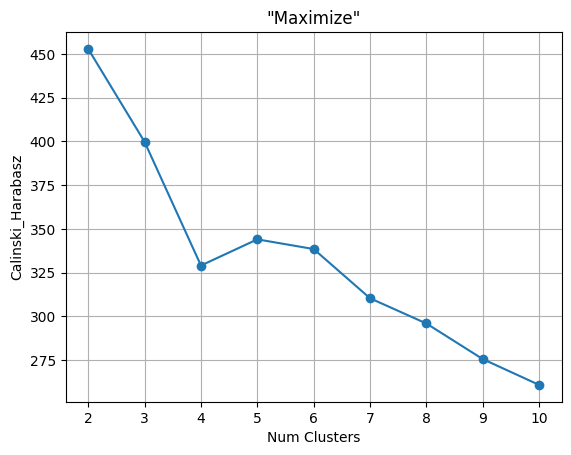

In [ ]:
# Determinación de grupos para Spectral clustering con índice Calinski-Harabasz.
nc = 11
results = {}
for k in range (2, nc):
   spectral = cluster.SpectralClustering(n_clusters=k, affinity='nearest_neighbors')
   y_pred3 = spectral.fit_predict(x)
   results[k] = metrics.calinski_harabasz_score(x, y_pred3)

cluster_counts = list(results.keys())
index_values = list (results.values())

plt.plot(cluster_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(cluster_counts)
plt.ylabel('Calinski_Harabasz')
plt.show()

De acuerdo con los análisis de validación, 4 o 5 grupos serían adecuados para aplicar este modelo.

In [ ]:
# Spectral clustering
spectral = cluster.SpectralClustering(n_clusters=4, affinity='nearest_neighbors')
y_pred3 = spectral.fit_predict(x)
s3 = metrics.silhouette_score(x, y_pred3)

In [ ]:
# Añadir al df una columna con el número de grupo que tiene cada registro.
employees2['Group-Spectral'] = y_pred3
employees2

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate,Group-KMeans,Group-SingleLinkage,Group-Spectral
0,0.0,42.0,4,0.0,1.0,2.0,2.0,4.0,4,33,1,1,7.0,2.0,3.0,0.1841,0,0,1
1,1.0,24.0,3,1.0,3.0,3.0,0.0,5.0,4,36,0,3,6.0,2.0,4.0,0.0670,2,0,3
2,0.0,58.0,3,0.0,0.0,8.0,2.0,27.0,3,51,0,2,8.0,2.0,1.0,0.0851,3,0,1
3,0.0,26.0,3,1.0,2.0,1.0,1.0,4.0,3,56,1,3,8.0,2.0,1.0,0.0668,2,0,2
4,0.0,31.0,1,0.0,3.0,3.0,2.0,5.0,4,62,1,3,2.0,3.0,3.0,0.1827,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,23.0,5,0.0,1.0,5.0,1.0,4.0,1,20,1,2,6.0,3.0,3.0,0.7839,1,0,1
6996,0.0,44.0,1,0.0,2.0,9.0,0.0,16.0,2,59,0,2,4.0,3.0,3.0,0.1055,0,0,1
6997,0.0,49.0,3,1.0,3.0,2.0,3.0,10.0,1,59,1,2,3.0,2.0,4.0,0.7847,1,0,2
6998,0.0,47.0,3,0.0,4.0,10.0,1.0,24.0,1,21,1,5,8.0,0.0,2.0,0.4162,3,0,1


In [ ]:
# Analizar cuántos registros tiene cada uno de los grupos.
employees3 = []
for g in range(4):
  employees3.append(employees2[employees2['Group-Spectral']==g])

In [ ]:
for g in range (4):
  print('El grupo '+str(g), 'tiene', len(employees3[g]), 'registros.')

El grupo 0 tiene 1840 registros.
El grupo 1 tiene 2704 registros.
El grupo 2 tiene 1424 registros.
El grupo 3 tiene 1032 registros.


In [ ]:
# Df con medias de las variables por grupo para encontrar patrones.
groups_employees = pd.DataFrame()
groups_employees['Features'] = employees2.columns[:-3]
for g in range(4):
  row = []
  for col in groups_employees['Features']:
    if employees3[g][col].dtype != 'object':
      row.append(np.round(employees3[g][col].mean(),2))
    else:
      row.append(employees3[g][col].value_counts().keys()[0])
  groups_employees['Group'+str(g)] = row

In [ ]:
groups_employees

,Features,Group0,Group1,Group2,Group3
0,Gender,1.00,0.00,0.00,1.00
1,Age,39.68,39.61,39.68,39.49
2,Education_Level,3.17,3.20,3.19,3.18
3,Relationship_Status,0.00,0.01,1.00,1.00
4,Hometown,2.15,2.21,2.23,2.13
5,Unit,4.88,4.95,4.98,4.90
6,Decision_skill_possess,1.49,1.50,1.50,1.52
7,Time_of_service,13.26,13.31,13.40,13.30
8,Time_since_promotion,2.35,2.39,2.38,2.31
9,growth_rate,46.93,47.00,47.68,46.62


Con este método de clustering (4 grupos) los datos quedaron distribuidos de manera homogénea entre los grupos y no se percibe un patrón entre las variables. Por lo tanto, se realizará el análisis nuevamente con 5 grupos.

In [ ]:
# Spectral clustering
spectral = cluster.SpectralClustering(n_clusters=5, affinity='nearest_neighbors')
y_pred4 = spectral.fit_predict(x)
s3 = metrics.silhouette_score(x, y_pred4)

In [ ]:
# Añadir al df una columna con el número de grupo que tiene cada registro.
employees2['Group-Spectral2'] = y_pred4
employees2

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate,Group-KMeans,Group-SingleLinkage,Group-Spectral,Group-Spectral2
0,0.0,42.0,4,0.0,1.0,2.0,2.0,4.0,4,33,1,1,7.0,2.0,3.0,0.1841,0,0,1,2
1,1.0,24.0,3,1.0,3.0,3.0,0.0,5.0,4,36,0,3,6.0,2.0,4.0,0.0670,2,0,3,1
2,0.0,58.0,3,0.0,0.0,8.0,2.0,27.0,3,51,0,2,8.0,2.0,1.0,0.0851,3,0,1,4
3,0.0,26.0,3,1.0,2.0,1.0,1.0,4.0,3,56,1,3,8.0,2.0,1.0,0.0668,2,0,2,3
4,0.0,31.0,1,0.0,3.0,3.0,2.0,5.0,4,62,1,3,2.0,3.0,3.0,0.1827,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,23.0,5,0.0,1.0,5.0,1.0,4.0,1,20,1,2,6.0,3.0,3.0,0.7839,1,0,1,2
6996,0.0,44.0,1,0.0,2.0,9.0,0.0,16.0,2,59,0,2,4.0,3.0,3.0,0.1055,0,0,1,2
6997,0.0,49.0,3,1.0,3.0,2.0,3.0,10.0,1,59,1,2,3.0,2.0,4.0,0.7847,1,0,2,3
6998,0.0,47.0,3,0.0,4.0,10.0,1.0,24.0,1,21,1,5,8.0,0.0,2.0,0.4162,3,0,1,4


In [ ]:
# Analizar cuántos registros tiene cada uno de los grupos.
employees3 = []
for g in range(5):
  employees3.append(employees2[employees2['Group-Spectral2']==g])

In [ ]:
for g in range (5):
  print('El grupo '+str(g), 'tiene', len(employees3[g]), 'registros.')

El grupo 0 tiene 1502 registros.
El grupo 1 tiene 996 registros.
El grupo 2 tiene 1863 registros.
El grupo 3 tiene 1372 registros.
El grupo 4 tiene 1267 registros.


In [ ]:
# Df con medias de las variables por grupo para encontrar patrones.
groups_employees = pd.DataFrame()
groups_employees['Features'] = employees2.columns[:-4]
for g in range(5):
  row = []
  for col in groups_employees['Features']:
    if employees3[g][col].dtype != 'object':
      row.append(np.round(employees3[g][col].mean(),2))
    else:
      row.append(employees3[g][col].value_counts().keys()[0])
  groups_employees['Group'+str(g)] = row

In [ ]:
groups_employees

,Features,Group0,Group1,Group2,Group3,Group4
0,Gender,1.00,1.00,0.01,0.00,0.30
1,Age,35.38,38.91,32.54,38.96,56.35
2,Education_Level,3.16,3.20,3.21,3.21,3.15
3,Relationship_Status,0.00,1.00,0.01,1.00,0.06
4,Hometown,2.18,2.12,2.23,2.23,2.13
5,Unit,4.80,4.91,4.88,4.97,5.12
6,Decision_skill_possess,1.49,1.51,1.47,1.47,1.58
7,Time_of_service,9.51,12.74,7.59,12.72,27.34
8,Time_since_promotion,2.33,2.29,2.33,2.37,2.51
9,growth_rate,47.01,46.53,46.95,47.89,46.83


Con el nuevo agrupamiento, los datos de mayor edad y tiempo de servicio quedaron en el grupo 5 (Group4), coincidente con uno de los grupos establecidos por KMeans.  
En los otros grupos hay una distribución homogénea entre las variables, es posible que este algoritmo no sea el más adecuado para el procesamiento de estos datos.

### Gráficos de agrupamiento

Se visualizaron 2 variables contra la tasa de deserción ('attrition_rate') con los 3 algoritmos de agrupamiento.

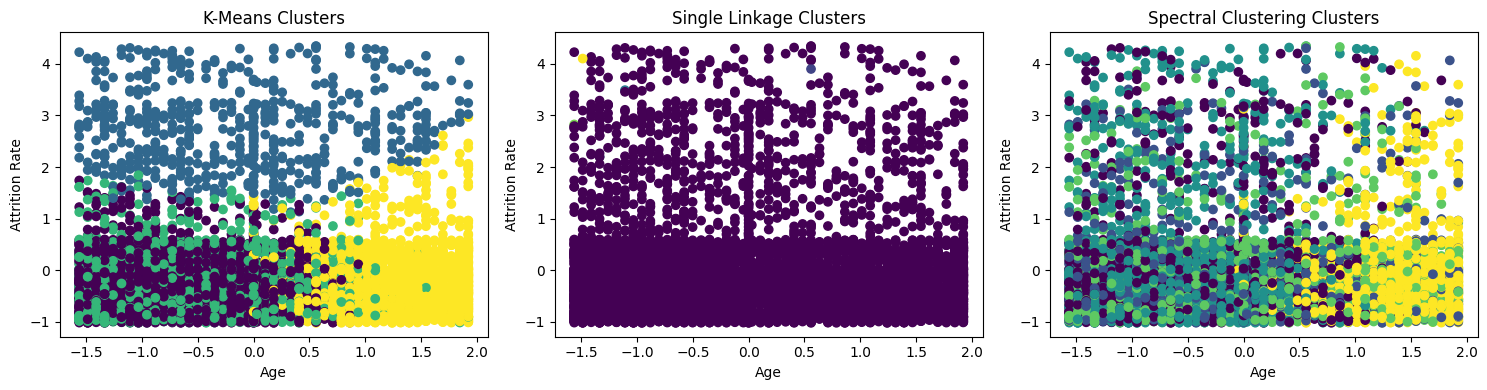

In [ ]:
# EDAD VS TASA DE DESERCIÓN
attrition_rate = x[:, 15]
age = x[:, 1]


fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Subplot para K-Means
axs[0].scatter(age, attrition_rate, c=y_pred)
axs[0].set_title('K-Means Clusters')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Attrition Rate')

# Subplot para Single Linkage
axs[1].scatter(age, attrition_rate, c=y_pred2)
axs[1].set_title('Single Linkage Clusters')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Attrition Rate')

# Subplot para Spectral Clustering
axs[2].scatter(age, attrition_rate, c=y_pred4)
axs[2].set_title('Spectral Clustering Clusters')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Attrition Rate')


plt.tight_layout()
plt.show()


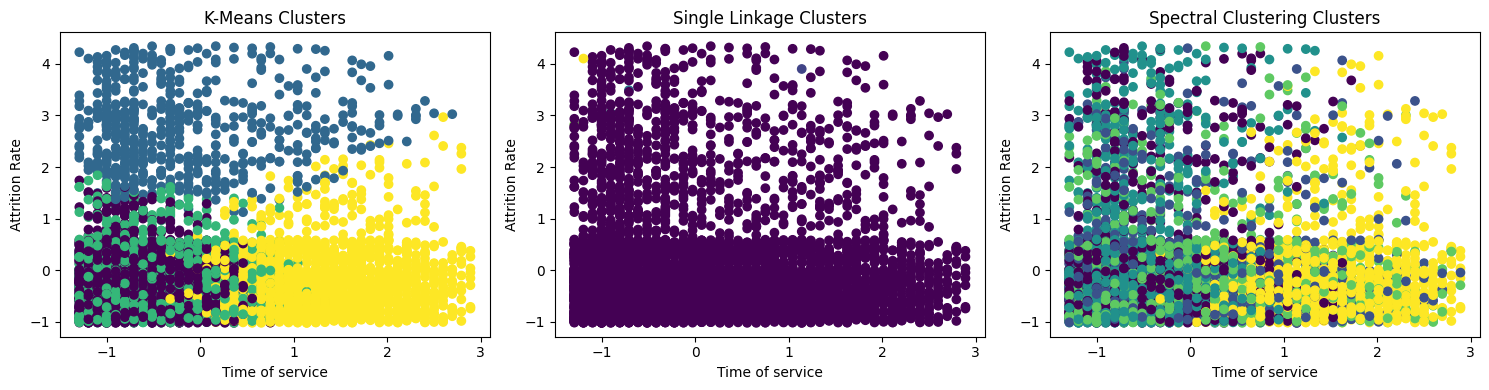

In [ ]:
# AÑOS DE SERVICIO VS TASA DE DESERCIÓN
attrition_rate = x[:, 15]
service = x[:, 7]


fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Subplot para K-Means
axs[0].scatter(service, attrition_rate, c=y_pred)
axs[0].set_title('K-Means Clusters')
axs[0].set_xlabel('Time of service')
axs[0].set_ylabel('Attrition Rate')

# Subplot para Single Linkage
axs[1].scatter(service, attrition_rate, c=y_pred2)
axs[1].set_title('Single Linkage Clusters')
axs[1].set_xlabel('Time of service')
axs[1].set_ylabel('Attrition Rate')

# Subplot para Spectral Clustering
axs[2].scatter(service, attrition_rate, c=y_pred4)
axs[2].set_title('Spectral Clustering Clusters')
axs[2].set_xlabel('Time of service')
axs[2].set_ylabel('Attrition Rate')


plt.tight_layout()
plt.show()